# Análise exploratória dos atributos numéricos (Discretos de razão)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
np.random.seed(777)

df = pd.read_csv('../data/preprocessed/_10_num_ohe.csv')

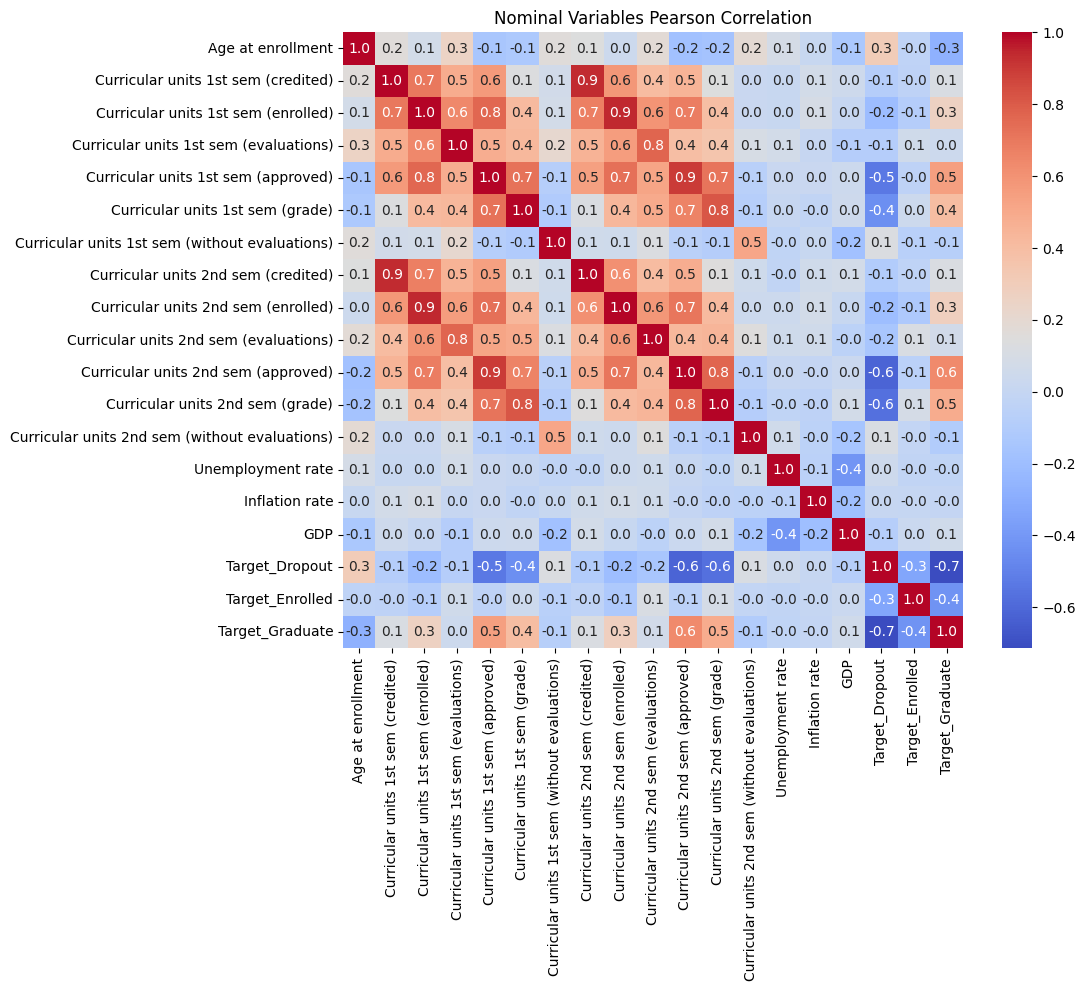

In [5]:
peason_corr = df.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(peason_corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Nominal Variables Pearson Correlation')
plt.show()

In [6]:
df_targetless = df.drop(columns=['Target_Dropout','Target_Enrolled','Target_Graduate'])

In [7]:
df_targetless = sm.add_constant(df_targetless)

vif_data = pd.DataFrame()
vif_data["Feature"] = df_targetless.columns
vif_data["VIF"] = [variance_inflation_factor(df_targetless.values, i) for i in range(df_targetless.shape[1])]

print(vif_data[vif_data['VIF'] > 5])

                                Feature        VIF
0                                 const  52.408779
2   Curricular units 1st sem (credited)  12.702780
3   Curricular units 1st sem (enrolled)  21.345763
5   Curricular units 1st sem (approved)  11.623312
8   Curricular units 2nd sem (credited)  10.528329
9   Curricular units 2nd sem (enrolled)  15.586539
11  Curricular units 2nd sem (approved)   9.123583
12     Curricular units 2nd sem (grade)   5.032343


In [8]:
print(vif_data[vif_data['VIF'] <= 5])

                                           Feature       VIF
1                                Age at enrollment  1.301746
4           Curricular units 1st sem (evaluations)  3.828762
6                 Curricular units 1st sem (grade)  4.472533
7   Curricular units 1st sem (without evaluations)  1.532446
10          Curricular units 2nd sem (evaluations)  3.276324
13  Curricular units 2nd sem (without evaluations)  1.481134
14                               Unemployment rate  1.313809
15                                  Inflation rate  1.120348
16                                             GDP  1.410557


In [9]:
drop_candidates = vif_data[vif_data['Feature'] != 'const']
drop_candidates = drop_candidates[vif_data['VIF'] > 5]['Feature']

C:\Users\Felipe Castro\AppData\Local\Temp\ipykernel_19536\1341915933.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drop_candidates = drop_candidates[vif_data['VIF'] > 5]['Feature']


In [10]:
drop_candidates = drop_candidates.to_numpy()

In [11]:
drop_candidates = np.append(drop_candidates, ['Target_Dropout','Target_Enrolled','Target_Graduate'])

In [12]:
drop_candidates

array(['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Target_Dropout',
       'Target_Enrolled', 'Target_Graduate'], dtype=object)

In [13]:
df_drop_candidates = df[drop_candidates]
df_drop_candidates

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target_Dropout,Target_Enrolled,Target_Graduate
0,0,6,0,0,6,0,0.000000,True,False,False
1,0,6,5,0,6,5,12.200000,False,False,True
2,0,6,6,0,6,6,13.571429,False,False,True
3,0,7,7,0,8,8,14.755556,False,False,True
4,0,5,1,0,5,1,11.000000,True,False,False
...,...,...,...,...,...,...,...,...,...,...
437,0,6,5,0,6,5,12.400000,False,True,False
438,0,5,5,0,5,5,12.200000,False,False,True
439,0,5,0,0,6,0,0.000000,True,False,False
440,1,5,3,0,5,2,13.500000,True,False,False


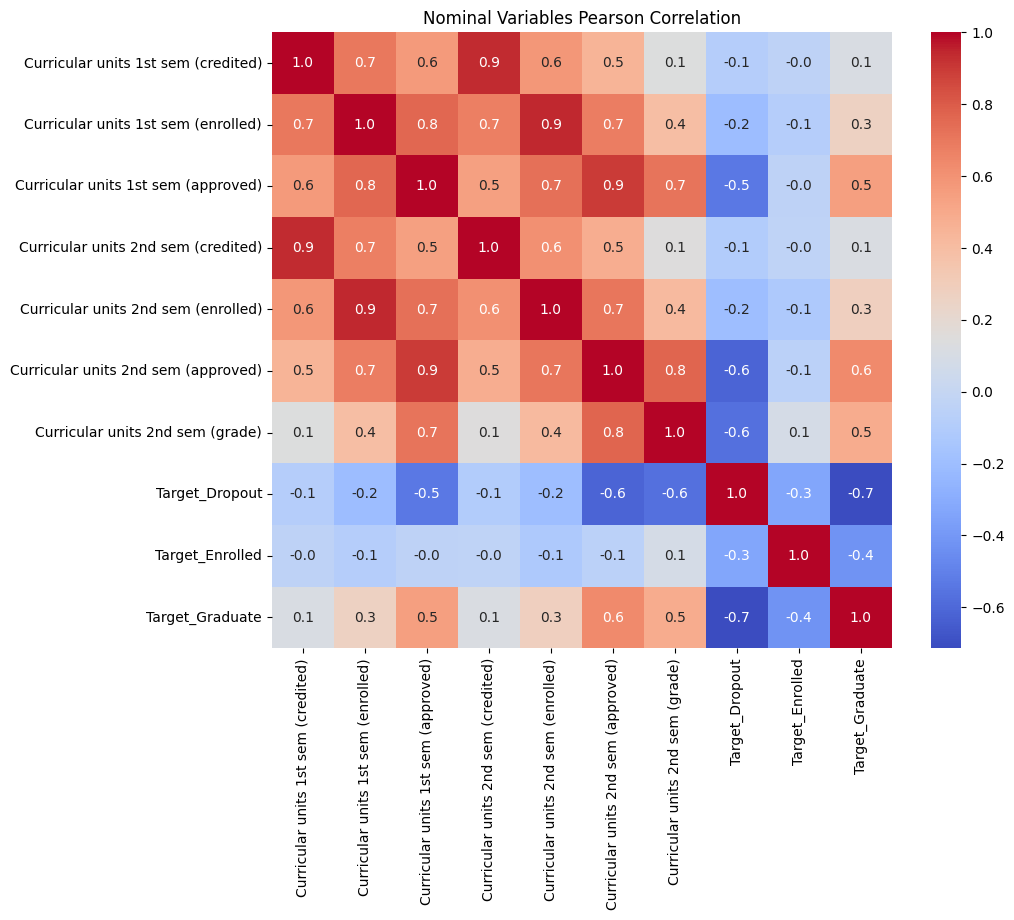

In [14]:
peason_corr = df_drop_candidates.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(peason_corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Nominal Variables Pearson Correlation')
plt.show()

## Conclusão

Removeremos as variaveis com maior colinearidade e menor correlação com o Target

In [15]:
peason_corr.columns

Index(['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Target_Dropout', 'Target_Enrolled',
       'Target_Graduate'],
      dtype='object')

In [16]:
drop_columns = [
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (grade)'
       ]

In [17]:
keep_candidates = vif_data[vif_data['VIF'] <= 5]
keep_candidates = keep_candidates['Feature']
keep_candidates = keep_candidates.to_numpy()

In [18]:
drop_columns.append('Curricular units 1st sem (evaluations)')
drop_columns.append('Curricular units 1st sem (without evaluations)')
drop_columns.append('Curricular units 2nd sem (evaluations)')
drop_columns.append('Curricular units 2nd sem (without evaluations)')

In [19]:
drop_columns

['Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (without evaluations)']

# Conclusão

Optamos por remover as colunas:

'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (without evaluations)'

 Pois elas possuem uma alta colinearidade entre si e podem deixar os modelos treinados com uma alta complexiade.